In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [5]:
df = pd.read_csv('../FeaturesCsvFile/featuresfile.csv')
df.shape

(417, 46)

In [6]:
X = df.values[:, 2:45]
y = df.values[:, 45] #label : walking/runing
y_plot = np.where(y == 'walking', -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y_plot, test_size=0.3)
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)

In [17]:
print('Accuracy of Accuracy Score : %.2f' % accuracy_score(y_test,y_pred))

Accuracy of Accuracy Score : 0.98


In [18]:
print('Accuracy of Perceptron Score: %.2f' % ppn.score(X_test,y_test))

Accuracy of Perceptron Score: 0.98


In [19]:
print ('Confusion_matrix')
print(confusion_matrix(y_test,y_pred))

Confusion_matrix
[[71  1]
 [ 1 53]]


In [7]:
print ('Important features (featureName, weigh of important, #column)')
header = list(df.head(1))
important_feature = []
for i in range(0,len(ppn.coef_[0])):
    important_feature.append((header[i+2],ppn.coef_[0][i],i+2))
sorted_list = sorted(important_feature,key=lambda important_feature: important_feature[1],reverse=True)
for j in range(0,len(sorted_list)):
        first_imp_fea = sorted_list[0]
        second_imp_fea = sorted_list[1]
        print sorted_list[j]

Important features (featureName, weigh of important, #column)
('StdDev-x', 134.54573382624937, 41)
('AvgAcc-z', 121.16392564828185, 40)
('StdDev-z', 116.06279584422469, 43)
('AvgAbsDiff-x', 114.84830617437348, 35)
('StdDev-y', 101.90904747311946, 42)
('AvgAbsDiff-z', 92.537781344373869, 37)
('AvgAbsDiff-y', 84.633640577981595, 36)
('TimeDiffPeaks-x', 23.589932453530086, 32)
('AvgResAcc', 7.8475955164305402, 44)
('Bin9,x', 3.4432528817298822, 10)
('Bin8,x', 2.9039789942786016, 9)
('Bin6,z', 2.8997102932648904, 27)
('Bin6,y', 2.6880899121395085, 17)
('Bin5,z', 2.6803970054451676, 26)
('Bin3,y', 2.4554512650171301, 14)
('Bin2,y', 2.213842420628966, 13)
('Bin4,z', 2.1742780864727096, 25)
('Bin3,x', 1.8151982129778814, 4)
('Bin4,y', 1.4627023342434773, 15)
('Bin10,x', 1.454554836074029, 11)
('Bin7,y', 1.4418092310188133, 18)
('Bin5,y', 1.4363673411264102, 16)
('Bin7,z', 1.3117573834461895, 28)
('Bin4,x', 1.1749455303083742, 5)
('Bin2,x', 1.1522514372212231, 3)
('Bin1,y', 0.59870900151330642

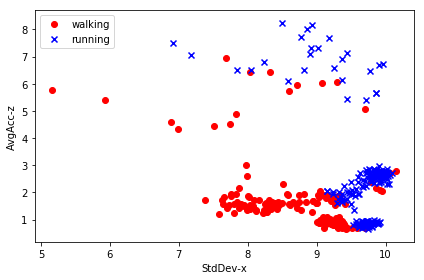

In [26]:
#get data first 100 rows
y = df.iloc[:, 45].values
y = np.where(y == 'walking', -1, 1)
#use AvgAbsDiff-x and AvgAbsDiff-y
X = df.iloc[:, [40,42]].values
# plot data
plt.scatter(X[:len(df)/2, 0], X[:len(df)/2, 1],
           color='red', marker='o', label='walking')
plt.scatter(X[len(df)/2:len(df), 0], X[len(df)/2:len(df), 1],
           color='blue', marker='x', label='running')

plt.xlabel('%s'%first_imp_fea[0])
plt.ylabel('%s'%second_imp_fea[0])
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

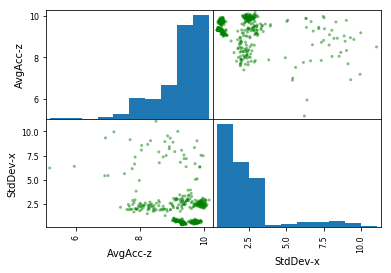

In [43]:
frame = df.loc[:,['AvgAcc-z','StdDev-x']]
test=scatter_matrix(frame,color='g')
plt.show()